In [96]:
import numpy as np
from skimage.io import imread
import os
from sklearn.neighbors import KNeighborsClassifier
import math
import matplotlib.pyplot as plt

data = np.zeros(shape=(1, 10304))

In [94]:
def scan_folder(parent):
    global data
    # iterate over all the files in directory 'parent'
    for file_name in sorted(os.listdir(parent), key=len):
        if file_name.endswith(".pgm"):
            # if it's a txt file, print its name (or do whatever you want)
            file_path = parent + '/' + file_name
            image = np.array(imread(file_path)).flatten()
            data = np.append(data, np.matrix(image), axis=0)

        else:
            current_path = "".join((parent, "/", file_name))
            if os.path.isdir(current_path):
                # if we're checking a sub-directory, recursively call this method
                scan_folder(current_path)

In [3]:
def comp_eigens(d):
    mean_values = np.mean(d, axis=0)
    Z = d - mean_values
    cov = np.cov(Z, rowvar=False, bias=1)
    return np.linalg.eigh(cov)

In [4]:
def PCA(alpha, eig_values, eig_vectors):
    r = 0
    s = np.sum(eig_values)
    explained_variance = 0.0
    for x in range(len(eig_values)):
        if explained_variance < alpha:
            explained_variance += eig_values[x]/s
        else:
            r = x
            break
    P = eig_vectors[:, :r]
    return P

In [ ]:
### bn3ml el testing data * el Ut el gebnaha w b3d keda dot product el tale3 ma3 el tala3 men el training data suppsed = I

if _name_ == '_main_':
    scan_folder('Pics')
    data = np.delete(data, 0, 0)
    labels = []
    count = 1
    for i in range(1, 401):
        labels.append(count)
        if i % 10 == 0:
            count += 1

    labels = np.array(labels)

    training_data = np.zeros(shape=(1, 10304))
    testing_data = np.zeros(shape=(1, 10304))
    training_labels = []
    testing_labels = []
    for i in range(data.shape[0]):
        if i % 2 == 0:
            testing_data = np.append(testing_data, data[i], axis=0)
            testing_labels.append(labels[i])
        else:
            training_data = np.append(training_data, data[i], axis=0)
            training_labels.append(labels[i])

    training_labels = np.array(training_labels)
    testing_labels = np.array(testing_labels)

    training_data = np.delete(training_data, 0, 0)
    testing_data = np.delete(testing_data, 0, 0)

    training_eigen_values, training_eigen_vectors = comp_eigens(training_data)
    training_eigen_values = np.flip(training_eigen_values)
    training_eigen_vectors = np.flip(training_eigen_vectors)

    alphas = [0.8, 0.85, 0.9, 0.95]
    for i in range(len(alphas)):
        #P = PCA(alphas[i], training_eigen_values, training_eigen_vectors)
        #projected_training_set = np.dot(training_data, P)
        #projected_testing_set = np.dot(testing_data, P)
        pass

    P = PCA(0.95, training_eigen_values, training_eigen_vectors)

    #projected_training_set = np.dot(P.T, training_data)
    projected_training_set = np.dot(training_data, P)
    projected_testing_set = np.dot(testing_data, P)

'''
    #f = np.dot(projected_training_set.T, projected_testing_set)
    #projected_testing_set = np.dot(P.T, testing_data)
    #index = np.argsort(training_eigen_values)[::-1]
    #training_eigen_values = training_eigen_values[index]
    #index = np.argsort(training_eigen_vectors)[::-1]
    #training_eigen_vectors = training_eigen_vectors[index]
   # testing_eigen_values, testing_eigen_vectors = comp_eigens(testing_data)
   # print(training_eigen_values)
  #  print(np.diag(training_eigen_values))
    #print(testing_eigen_values)

'''

In [97]:
scan_folder('Pics')
data = np.delete(data, 0, 0)
print(data.shape)
labels = []
count = 1
for i in range(1, 401):
    labels.append(count)
    if i % 10 == 0:
        count += 1

labels = np.array(labels)

(400, 10304)


In [10]:
training_data = np.zeros(shape=(1, 10304))
testing_data = np.zeros(shape=(1, 10304))
training_labels = []
testing_labels = []
for i in range(data.shape[0]):
    if i % 2 == 0:
        testing_data = np.append(testing_data, data[i], axis=0)
        testing_labels.append(labels[i])
    else:
        training_data = np.append(training_data, data[i], axis=0)
        training_labels.append(labels[i])

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

training_data = np.delete(training_data, 0, 0)
testing_data = np.delete(testing_data, 0, 0)

training_eigen_values, training_eigen_vectors = comp_eigens(training_data)
training_eigen_values = np.flip(training_eigen_values)
training_eigen_vectors = np.flip(training_eigen_vectors)


0.8029455554165242


37
K= 1
Model prediction: [16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 11 20
 20 20 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 39 30 30 30 30 30 31 31 31 21 31 32 32 32 32 32 33 33 33 33 33 34 34 34
 34 34 35 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40 40  5  5]
Alpha:0.8 
Accuracy:0.945
K= 3
Model prediction: [16  2  1  1  1  2  2  2  2  2  3  3 25  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 15 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 11 20
 20 20 20 20 21 21 21 2

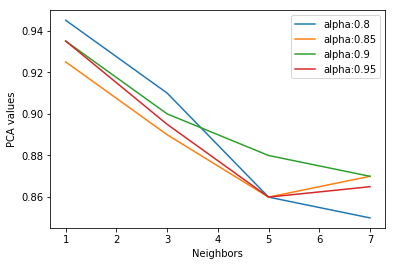

(39, 10304, 1)
K=  1
Accuracy: 0.95
K=  3
Accuracy: 0.89
K=  5
Accuracy: 0.885
K=  7
Accuracy: 0.885


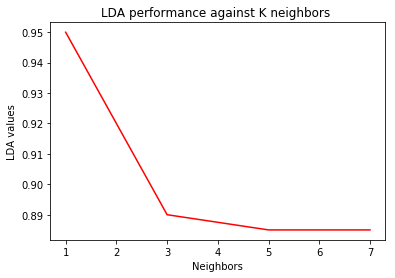

PCA avg: 0.89625
LDA avg:  0.9024999999999999
Since LDA average score is higher than the PCA average score then we prefer to take LDA


In [35]:
avg = []
alphas = [0.8, 0.85, 0.9, 0.95]
plt.figure(2)
plt.xlabel("Neighbors")
plt.ylabel("PCA values")
k = [1, 3, 5, 7]
for i in range(len(alphas)):
    pca_scores = []
    s = 0
    P = PCA(alphas[i], training_eigen_values, training_eigen_vectors)
    projected_training_set = np.dot(training_data, P)
    projected_testing_set = np.dot(testing_data, P)
    for j in range(1, 8, 2):
        print("K=", j)
        knn = KNeighborsClassifier(n_neighbors=j, weights='distance')

        knn.fit(projected_training_set, training_labels)

        print("Model prediction: {}".format(knn.predict(projected_testing_set)))
        score = knn.score(projected_testing_set, testing_labels)
        s += score
        pca_scores.append(score)
        print("Alpha:{} \nAccuracy:{}".format(alphas[i], score))
    plt.plot(k, pca_scores, label='alpha:{}'.format(alphas[i]))
    avg.append(s/4)
plt.legend()
plt.show()

plt.title("PCA performance against K neighbors ")

LDA_AVG = LDA(training_data, testing_data, training_labels)
PCA_AVG = np.max(np.array(avg))
print("PCA avg:", PCA_AVG)
print("LDA avg: ", LDA_AVG)
if LDA_AVG > PCA_AVG:
    print("Since LDA average score is higher than the PCA average score then we prefer to take LDA")

else:
    print("Since PCA average score is higher than the LDA average score then we prefer to take PCA")

In [33]:
def LDA(d, test, labels):
    Ur = []
    tempZ = np.zeros((5, 10304))
    S = np.zeros((1, 10304))
    sb = np.zeros((1, 10304))
    mean_values = np.mean(d, axis=0)
    means = np.zeros((1, 10304))
    Z = np.zeros((1, 10304))
    for i in range(40):
        means = np.append(means, np.mean(d[5 * i:5 + 5 * i, :], axis=0), axis=0)
    means = np.delete(means, 0, 0)

    x = (means[0] - mean_values)
    sb = np.append(sb, 5 * np.dot(x.T, x), axis=0)
    sb = np.delete(sb, 0, 0)

    for i in range(1, 40):
        x = (means[i] - mean_values)
        sb += 5 * np.dot(x.T, x)

    for i in range(200):
        Z = np.append(Z, d[i] - means[math.floor(i / 5)], axis=0)
    Z = np.delete(Z, 0, 0)

    tempZ = Z[0:5, :]
    S = np.append(S, np.dot(tempZ.T, tempZ), axis=0)
    S = np.delete(S, 0, 0)

    for i in range(1, 40):
        tempZ = Z[5 * i:5 + 5 * i, :]
        S += np.dot(tempZ.T, tempZ)

    eig_vals, eig_vecs = np.linalg.eigh(np.dot(np.linalg.inv(S), sb))
    Ur.append(eig_vecs[:, 10303])

    for i in range(1, 39):
        Ur.append(eig_vecs[:, 10303 - i])
    Ur = np.array(Ur)
    print(Ur.shape)
    project_training = np.dot(d, Ur.T)
    project_test = np.dot(test, Ur.T)
    ldaavg = 0
    lda_scores = []
    K = [1, 3, 5, 7]
    for z in range(1, 8, 2):
        model = KNeighborsClassifier(n_neighbors=z, weights='distance')
        model.fit(project_training, labels)
        score = model.score(project_test, labels)
        lda_scores.append(score)
        ldaavg += score
        print("K= ", z)
        print("Accuracy:", score)
    ldaavg = ldaavg/4
    plt.figure(1)
    plt.xlabel("Neighbors")
    plt.ylabel("LDA values")
    plt.plot(K, lda_scores, c='r')
    plt.title("LDA performance against K neighbors ")
    plt.show()
    return ldaavg

In [99]:
#7- Compare vs Non-face images
data = np.zeros(shape=(1, 10304))
print(data.shape)
scan_folder('Non-face pics')
data = np.delete(data, 0, 0)
print(data.shape)


(1, 10304)
(27, 10304)
